# Caravan war ambush analysis
```
This is a personal project to understand and improve my knowledge/tactics in the game Caravan War.
Copyright (C) 2019  Kasonnara <kasonnara@laposte.net>

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
```

In [3]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas

## Load collected loot samples

In [4]:
loot_df = pandas.read_csv(
    "data/ambush_loots.csv", 
    index_col=('day', 'id'),
    na_values=('', ' ', '     ', '  '), 
    skip_blank_lines = True,
    parse_dates = ['day'],
    dayfirst = True,
    )

loot_df

is_bot  star_score  gems  potions  legendary_souls  \
day        id                                                      
2020-04-09 1     NaN           3   NaN      NaN              NaN   
           2    True           3  25.0      0.0              2.0   
           3    True           3  23.0      0.0              2.0   
           4   False           0   0.0      0.0              0.0   
           5    True           3  19.0      0.0              2.0   
           6   False           3  17.0      0.0              3.0   
           7    True           3  23.0      0.0              2.0   
           8    True           3   NaN      0.0              NaN   
           9    True           3  17.0      1.0              2.0   
           10  False           3   0.0      1.0              2.0   
           11   True           3   0.0      0.0              2.0   
           12   True           3   0.0      0.0              2.0   
           13   True           3  21.0      0.0              0.0   
           14   True           3   0.0      0.0              3.0   
           15   True           3  14.0      1.0              0.0   
2020-04-10 1    True           3  19.0      1.0              3.0   
           2    True           3   0.0      1.0              0.0   
           3    True           3   0.0      1.0              3.0   
           4    True           3   0.0      0.0              2.0   
           5    True           3   0.0      1.0              0.0   
           6   False           1  21.0      0.0              3.0   
           7    True           2  14.0      0.0              3.0   
           8    True           3   0.0      0.0              2.0   
           9    True           3   0.0      0.0              2.0   
           10   True           3  17.0      1.0              0.0   
           11   True           3   0.0      0.0              0.0   
           12   True           3  24.0      0.0              2.0   
           13   True           3  19.0      0.0              3.0   
           14   True           3  17.0      0.0              0.0   
           15   True           3   0.0      0.0              0.0   
...              ...         ...   ...      ...              ...   
2020-04-18 7    True           1  16.0      1.0              0.0   
           8   False           3  25.0      0.0              3.0   
           9    True           3  19.0      0.0              3.0   
           10   True           3   0.0      1.0              0.0   
2020-04-19 1   False           2  19.0      0.0              2.0   
2020-04-20 1   False           3   0.0      1.0              0.0   
           2    True           3   0.0      0.0              2.0   
           3    True           3  15.0      1.0              0.0   
           4    True           3  17.0      1.0              3.0   
           5   False           3   0.0      1.0              2.0   
           6    True           3  15.0      1.0              2.0   
           7    True           3   0.0      0.0              0.0   
           8    True           3   0.0      0.0              0.0   
           9    True           3  18.0      0.0              2.0   
           10   True           3  19.0      0.0              3.0   
           11   True           3   0.0      0.0              0.0   
           12   True           3   0.0      0.0              3.0   
           13   True           3  17.0      0.0              2.0   
           14   True           3  21.0      0.0              2.0   
           15   True           3  19.0      0.0              0.0   
           16   True           3   0.0      0.0              2.0   
           17  False           3  23.0      0.0              3.0   
           18   True           3   0.0      0.0              0.0   
           19   True           3   0.0      0.0              0.0   
           20   True           3   0.0      0.0              0.0   
           21   True           3   0.0      0.0              0.0   
  

## Preprocess

Remove battle with 0 stars as you never loot anything there.  
**We assume that they doesn't impact following battles.**

In [5]:
# remove lines
only_wins_loot_df = loot_df[loot_df['star_score'] > 0]

#only_wins_loot_df

Replace NaN with '0' or 'False' values. **We assume that there was no loot**. This may impact result, especially for NaN in the very first ambushes of a day, but we have no choice but to ignore them.

In [6]:
clean_loot_df = only_wins_loot_df.fillna(
    value = {
        'gems': 0,
        'potions': 0,
        'legendary_souls': 0,
        'reincarnation_medals': 0,
    }
    )

#clean_loot_df

## Compute resource sum per day

In [7]:
# add a column of 1 to generate a new index later
clean_loot_df['ones'] = 1

# Group by day and sum resources and ones
sums = (
    clean_loot_df[['gems', 'potions', 'legendary_souls', 'reincarnation_medals', 'ones']]
    .groupby(by='day')
    .cumsum(skipna=True)
    # replace the index
    .reset_index()
    .drop(axis=1, labels='id')
    .rename(columns={'ones': 'ambushes_won'})
    .set_index(keys=['day','ambushes_won'])
)


#sums

## Compute expected values

In [8]:
average_sums = sums.groupby(by='ambushes_won').mean().cummax()

#average_sums
#average_sums.max()

## Display results

In [9]:
sums.reset_index("ambushes_won").groupby(by='day').max()

,ambushes_won,gems,potions,legendary_souls,reincarnation_medals
day,,,,,
2020-04-09,14,159.0,3.0,22.0,6.0
2020-04-10,29,150.0,5.0,26.0,26.0
2020-04-11,2,19.0,1.0,5.0,2.0
2020-04-12,25,161.0,5.0,26.0,25.0
2020-04-13,8,30.0,4.0,8.0,7.0
2020-04-14,30,150.0,5.0,26.0,25.0
2020-04-15,29,157.0,5.0,25.0,26.0
2020-04-16,24,154.0,5.0,25.0,25.0
2020-04-17,12,140.0,5.0,14.0,7.0


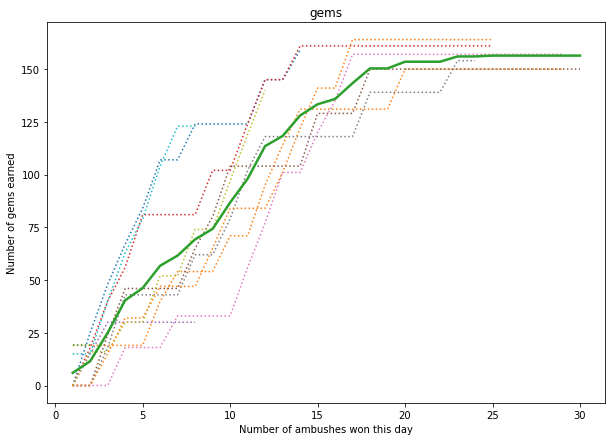

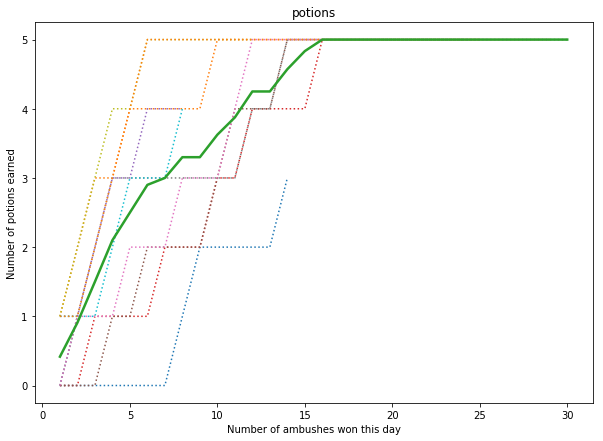

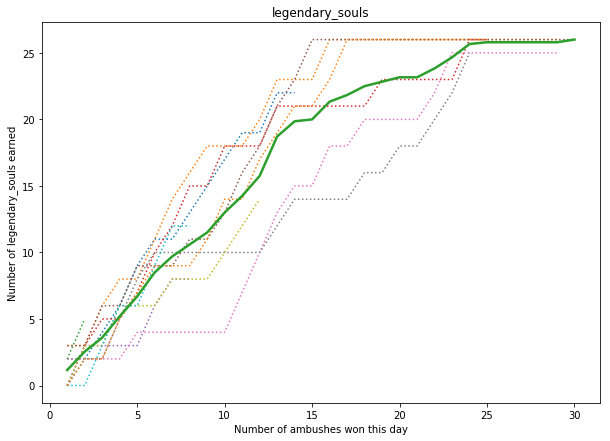

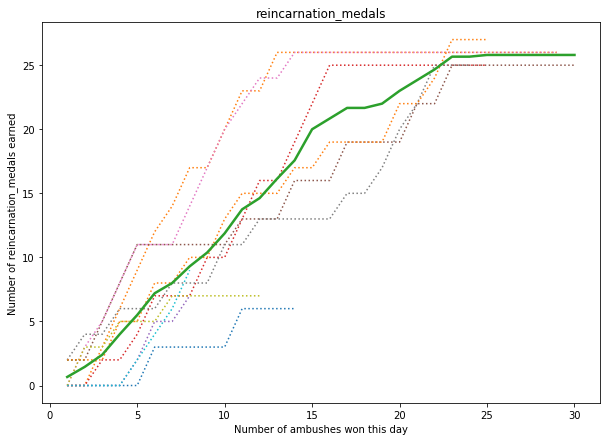

In [10]:
unindexed_sums = sums.reset_index()

resource_cols = [
    'gems',
    'potions',
    'legendary_souls',
    'reincarnation_medals',
]

figs = {}
axes = {}
for res in resource_cols:
    figs[res] = plt.figure(figsize=(10, 7))
    axes[res] = figs[res].add_subplot(111, title=res, xlabel="Number of ambushes won this day",
                                     ylabel="Number of {} earned".format(res))

# Plot each day cumulative sums
for day in unindexed_sums.day.unique():
    #print(day, '\n', unindexed_sums[unindexed_sums.day == day])
    for res in resource_cols:
        axes[res].plot(
            unindexed_sums[unindexed_sums.day == day]['ambushes_won'],
            unindexed_sums[unindexed_sums.day == day][res],
            ":",
        )

# Plot the average cumulative sums
for res in resource_cols:
    axes[res].plot(
        average_sums.index, 
        average_sums[res],
        linewidth=2.5,
    
    )
        

## Compute bandit shield frequency

In [11]:
no_shield = (only_wins_loot_df.bandit_shield == False).sum()
shield = (only_wins_loot_df.bandit_shield == True).sum()

print("Total mesures = {}\nShield obtained = {}\nAmbushes with no shield = {}\nAverage shield = {}".format(no_shield + shield, shield, no_shield, shield/(shield+no_shield)))

Total mesures = 205
Shield obtained = 93
Ambushes with no shield = 112
Average shield = 0.45365853658536587


In [12]:
#only_wins_loot_df[(only_wins_loot_df.bandit_shield != True) & (only_wins_loot_df.bandit_shield != False)]

In [20]:
# Find confidence interval, assuming we have a binomial distribution
from scipy.stats import binom

confidence_interval_limit = 0.05

#for loot_probability in [0.3, 0.45, 0.5]: 
#    data_probability_knowing_loot_probability = binom.pmf(shield, shield + no_shield, loot_probability)
#    print(data_probability_knowing_loot_probability)

p_min_low, p_min_high = 0, 1
p_max_low, p_max_high = 0, 1

def confidence_min(p_min):
    return binom.cdf(shield, shield + no_shield, p_min) - confidence_interval_limit/2

def confidence_max(p_max):
    return 1 - binom.cdf(shield - 1, shield + no_shield, p_max) - confidence_interval_limit/2

def dicotomy(func, x1, x2, error = confidence_interval_limit * 0.01):
    def dicotomy_aux(func, x_min, x_max, error):
        x = (x_min + x_max)/2
        fx = func(x)
        if abs(fx) <= error:
            return x
        elif fx > 0:
            return dicotomy_aux(func, x_min, x, error)
        else:
            return dicotomy_aux(func, x, x_max, error)
        
    f1, f2 = func(x1), func(x2)
    if f1 == 0:
        return x1
    elif f2 == 0:
        return x2
    elif func(x1) < 0:
        assert func(x2) > 0
        return dicotomy_aux(func, x1, x2, error)
    else:
        assert func(x2) < 0
        return dicotomy_aux(func, x2, x1, error)

confidence_interval = (dicotomy(confidence_min, 0, 1), dicotomy(confidence_max, 0, 1))

In [27]:
print("Assuming that the bandit shield drop follow a binomial distribution, the collected data indicate (with {}% certainty) that the true drop probability is between {}% and {}%"
    .format(
        round((1-confidence_interval_limit)*100),
        round(confidence_interval[1]*100),
        round(confidence_interval[0]*100),
        )
    )

Assuming that the bandit shield drop follow a binomial distribution, the collected data indicate (with 95% certainty) that the true drop probability is between 38% and 52%
